# Problem statement

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the company data. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services

Credit card / Prepaid card

Bank account services

Theft/Dispute reporting

Mortgages/loans

Others

With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

In [2]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
# !pip install en_core_web_sm

In [3]:
import en_core_web_sm

In [4]:
nlp = en_core_web_sm.load()

In [5]:
#Importing Regular Expressions for String manipulation
import re

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [6]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [8]:
root_path = '/content/drive/MyDrive/A-NLP Ticket/Client_data.json'

In [12]:
# Opening JSON file 
f = open(root_path) 

# returns JSON object as a dictionary 
data = json.load(f)

# Data preparation

Data cleaning operations like filtering text, removing missing values & renaming column headers.

In [13]:
df=pd.json_normalize(data)

In [ ]:
# df.to_excel('client_data.xlsx')

In [14]:
# Inspect the dataframe to understand the given data.
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [15]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [16]:
#Assign new column names
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [17]:
# lets rename the column names to be more read friendly
# we have retained product and sub_product only for verification purpose ,
# these columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [18]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [19]:
# lets check the nan complaints
df.complaint_text.isnull().sum()

0

In [20]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])

57241

In [21]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()

57241

In [22]:
df.columns

Index(['complaint_text', 'category'], dtype='object')

In [23]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

# Text Preprocessing

Prepare the text for topic modeling
Once you have removed all the blank complaints, you need to:

Make the text lowercase
Remove text in square brackets
Remove punctuation
Remove words containing numbers
Once you have done these cleaning operations you need to perform the following:

Lemmatize the texts
Use POS tags to get relevant words from the texts.

In [24]:
# Write your function here to clean the text and remove all the unnecessary elements.
# Preparing text for Topic modelling
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [25]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx  xxxx  ticket i...
14    my grand son give me check for i deposit it in...
Name: complaint_text, dtype: object

In [26]:
#Write your function to Lemmatize the texts
# lemmatization
#Function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [25]:
# Lemmatize the complaints
df['lemma'] =  df.complaint_text.apply(lambda x: lemmatizer(x))
# df.head()

,complaint_text,category,lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...


In [26]:
lemma = df['lemma']

In [27]:
import pickle
# with open('/content/drive/MyDrive/A-NLP Ticket/complaint.pkl','wb') as f:
#     pickle.dump(lemma,f)
    

In [27]:
import pickle
with open('/content/drive/MyDrive/A-NLP Ticket/complaint.pkl','rb') as f:
    lemma = pickle.load(f)

In [29]:
df['lemma'] = lemma

In [30]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaint_text','lemma','category']]
df_clean.head()

,complaint_text,lemma,category
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account


In [29]:
#Write your function to extract the POS tags NN
def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

In [30]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean['complaint_POS_removed'] =  df_clean.lemma.apply(lambda x: extract_pos_tags(x))
df_clean.head()

,complaint_text,lemma,category,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help write chase debt verification sta...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,agent upgrade anniversary date change agent in...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket ticket reward card information off...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account account pay money sp...


In [31]:
# complaint_pos_removed = df_clean['complaint_POS_removed']
# with open('/content/drive/MyDrive/A-NLP Ticket/cpos_removed.pkl','wb') as f:
#     pickle.dump(complaint_pos_removed, f)

In [31]:
 with open('/content/drive/MyDrive/A-NLP Ticket/cpos_removed.pkl','rb') as f:
    complaint_pos_removed = pickle.load(f)

In [32]:
df_clean['complaint_POS_removed'] = complaint_pos_removed

In [33]:
df_clean.head()

,complaint_text,lemma,category,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help write chase debt verification sta...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,agent upgrade anniversary date change agent in...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket ticket reward card information off...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account account pay money sp...


# Exploratory data analysis (EDA)

Exploratory data analysis to get familiar with the data.
Write the code in this task to perform the following:

Visualise the data according to the 'Complaint' character length
Using a word cloud find the top 40 words by frequency among all the articles after processing the text
Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘

(array([9.445e+03, 6.355e+03, 2.632e+03, 1.242e+03, 7.340e+02, 2.560e+02,
        1.320e+02, 7.000e+01, 5.400e+01, 4.400e+01, 2.600e+01, 1.300e+01,
        6.000e+00, 1.200e+01, 1.200e+01, 5.000e+00, 6.000e+00, 3.000e+00,
        4.000e+00, 3.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0.  ,   236.44,   472.88,   709.32,   945.76,  1182.2 ,
         1418.64,  1655.08,  1891.52,  2127.96,  2364.4 ,  2600.84,
         2837.28,  3073.72,  3310.16,  3546.6 ,  3783.04,  4019.48,
         4255.92,  4492.36,  4728.8 ,  4965.24,  5201.68,  5438.12,
         5674.56,  5911.  ,  6147.44,  6383.88,  6620.32,  6856.76,
         7093.2 ,  7329.64,  7566.08

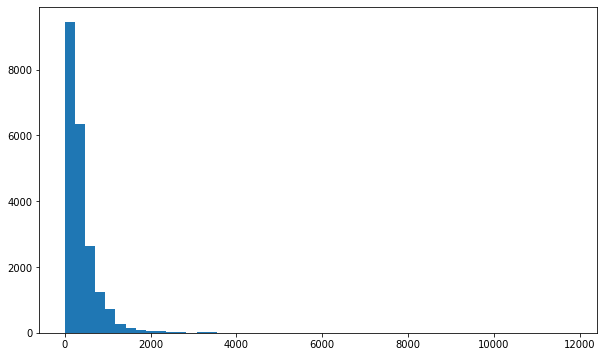

In [34]:
# Write your code here to visualise the data according to the 'Complaint' character length

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)

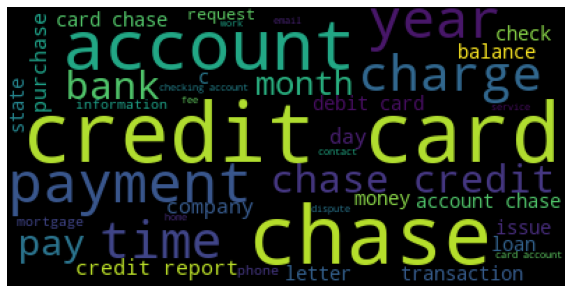

In [35]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,max_words=40).generate(str(df_clean.complaint_POS_removed))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [36]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean = df_clean.drop(['complaint_POS_removed'],axis = 1)

Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [37]:
# Write your code here to find the top 30 unigram,bigram,trigram frequency 
# among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [38]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)

In [39]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('chase', 55396),
 ('account', 39603),
 ('credit', 32425),
 ('card', 29043),
 ('payment', 20181),
 ('charge', 16501),
 ('time', 15214),
 ('money', 11665),
 ('day', 11643),
 ('bank', 11139)]

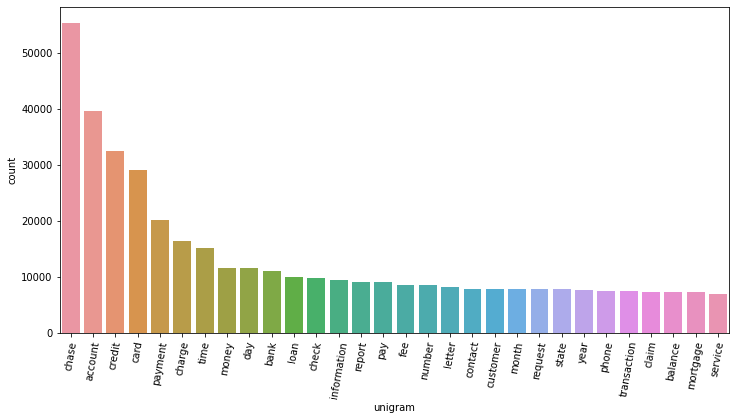

In [40]:
#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

In [41]:
#Print the top 10 words in the bigram frequency
print('Top 10 bigrams:\n')
top_30_bigrams[:10]

Top 10 bigrams:



[('credit card', 12171),
 ('credit report', 3618),
 ('chase credit', 3135),
 ('customer service', 2714),
 ('account chase', 2657),
 ('chase account', 2181),
 ('contact chase', 1931),
 ('debit card', 1909),
 ('account account', 1837),
 ('chase bank', 1770)]

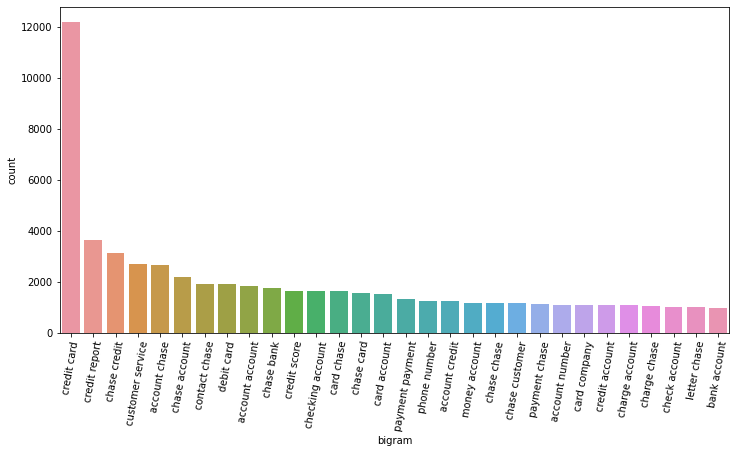

In [42]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [43]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('chase credit card', 2159),
 ('credit card account', 986),
 ('credit card company', 958),
 ('credit card chase', 815),
 ('chase customer service', 509),
 ('charge credit card', 495),
 ('inquiry credit report', 456),
 ('credit card credit', 454),
 ('account credit card', 358),
 ('credit card charge', 356)]

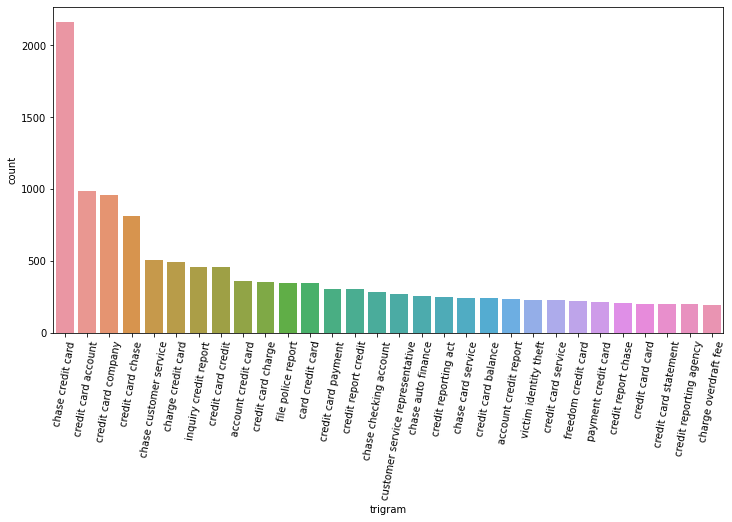

In [44]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [45]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [46]:
#All masked texts has been removed
df_clean.head()

,complaint_text,lemma,category,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help write chase debt verification sta...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,agent upgrade anniversary date change agent in...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket ticket reward card information off...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account account pay money sp...


# Feature Extraction

Convert the raw texts to a matrix of TF-IDF features
max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [47]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

##Create a document term matrix using fit_transform
The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score: The tuples that are not there have a tf-idf score of 0

In [48]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean) 

In [49]:
tfidf.get_feature_names()[:10]

['aarp',
 'abate',
 'abatement',
 'abbreviation',
 'abet',
 'abhorrent',
 'abide',
 'ability',
 'abovereference',
 'absence']

In [50]:
len(tfidf.get_feature_names())

6116

# Non Semantic Topic Modelling

### LDA

Intuition behind LDA:
1. Assign topics randomly to documents.
2. Iterate over each document and calculate:
      p(topic t | document d): the proportion of words in document d that are assigned to topic t. 
      p(word w| topic t):Tries to capture how many documents are in topic t because of word w.
3. On each iteration update:
   p(word w with topic t) = p(topic t | document d) * p(word w | topic t)

In [51]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [52]:
df_clean.head()

,complaint_text,lemma,category,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help write chase debt verification sta...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,agent upgrade anniversary date change agent in...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket ticket reward card information off...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account account pay money sp...


In [53]:
df_clean['text_for_lda'] = df['complaint_text'].apply(lambda x: clean_text(x))

In [54]:
df_clean['text_for_lda'] = df_clean['text_for_lda'].str.replace('xxxx','')

In [55]:
data = df_clean['text_for_lda'].to_list()

In [56]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))#deacc=True removes punctuations
data_words = list(sent_to_words(data))
# print(data_words[:1])

In [57]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)


## Note : This gensim bigram model combines the most frequently occuring words with an underscore like if cardmember and services occur frequently together then they will be combined as one token i.e cardmember_services.

In [58]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [59]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [60]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [61]:
#removing stop words
data_words_wo_stop = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
#make bigrams
data_words_bigrams = [bigram_mod[doc] for doc in data_words_wo_stop]
#lemmatization
data_words_pos = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [62]:
# Create Dictionary 
id2word = corpora.Dictionary(data_words_pos)  
# Create Corpus 
texts = data_words_pos  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]

In [63]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('acceptable', 1),
  ('account', 1),
  ('advance', 1),
  ('appreciate', 1),
  ('ask', 2),
  ('attempt', 1),
  ('bank', 1),
  ('cardmember_service', 1),
  ('chase', 3),
  ('collect', 1),
  ('consumer', 1),
  ('debt', 3),
  ('help', 2),
  ('information', 1),
  ('instead', 1),
  ('mail', 1),
  ('month', 1),
  ('morning', 1),
  ('name', 1),
  ('put', 1),
  ('receive', 1),
  ('send', 1),
  ('statement', 1),
  ('stop', 1),
  ('thank', 1),
  ('validate', 1),
  ('verification', 1),
  ('write', 1)]]

Parameters of LDA

1. Alpha and Beta are Hyperparameters — alpha represents document-topic density and Beta represents topic-word density, chunksize is the number of documents to be used in each training chunk, update_every determines how often the model parameters should be updated and passes is the total number of training passes.
2. A measure for best number of topics really depends on kind of corpus you are using, the size of corpus, number of topics you expect to see.

In [67]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [64]:
lda_model5 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [68]:
pprint(lda_model5.print_topics())

[(0,
  '0.065*"payment" + 0.042*"chase" + 0.041*"pay" + 0.029*"loan" + '
  '0.024*"mortgage" + 0.022*"fee" + 0.019*"month" + 0.017*"year" + '
  '0.015*"interest" + 0.015*"balance"'),
 (1,
  '0.113*"credit" + 0.059*"card" + 0.046*"chase" + 0.044*"report" + '
  '0.042*"account" + 0.014*"remove" + 0.013*"information" + 0.012*"close" + '
  '0.011*"letter" + 0.009*"company"'),
 (2,
  '0.017*"request" + 0.016*"document" + 0.015*"letter" + 0.011*"file" + '
  '0.011*"provide" + 0.010*"property" + 0.010*"state" + 0.010*"send" + '
  '0.008*"home" + 0.008*"chase"'),
 (3,
  '0.049*"chase" + 0.045*"charge" + 0.034*"card" + 0.017*"receive" + '
  '0.017*"transaction" + 0.016*"dispute" + 0.013*"purchase" + 0.012*"claim" + '
  '0.010*"email" + 0.010*"service"'),
 (4,
  '0.049*"account" + 0.032*"call" + 0.030*"chase" + 0.025*"tell" + '
  '0.024*"check" + 0.021*"bank" + 0.019*"say" + 0.016*"money" + 0.014*"day" + '
  '0.012*"ask"')]


## LDA Quantitative analysis

Perplexity measures how well a topic model can predict the topic of a text.
It is a normalized log likelihood of a set of words appearing in a topic i.e  as the likelihood of the words appearing in new documents increases, as assessed by the trained LDA model, the perplexity decreases.

It is often a useless metric and doesnt comply with the topic coherence.

In [69]:
print('\nPerplexity with 20 topics: ', lda_model.log_perplexity(corpus))  


Perplexity with 20 topics:  -6.842940334915204


Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic

In [70]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_pos, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score 20 topics: ', coherence_lda)


Coherence Score 20 topics:  0.4358229133096879


In [71]:
print('\nPerplexity with 5 topics: ', lda_model5.log_perplexity(corpus))  


Perplexity with 5 topics:  -6.752489837275625


In [72]:
coherence_model_lda = CoherenceModel(model=lda_model5, texts=data_words_pos, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score 5 topics: ', coherence_lda)


Coherence Score 5 topics:  0.4082476569002159


## Qualitative Analysis

In [73]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model5, corpus=corpus, texts=data_words_pos)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.4173,"account, call, chase, tell, check, bank, say, ...","[morning, name, appreciate, help, put, stop, c..."
1,1,3.0,0.5815,"chase, charge, card, receive, transaction, dis...","[upgrade, card, tell, agent, upgrade, annivers..."
2,2,1.0,0.7774,"credit, card, chase, report, account, remove, ...","[chase, card, report, however, fraudulent, app..."
3,3,3.0,0.3371,"chase, charge, card, receive, transaction, dis...","[try, book, ticket, come, offer, apply, ticket..."
4,4,4.0,0.7919,"account, call, chase, tell, check, bank, say, ...","[son, give, check, deposit, chase, account, cl..."
5,5,1.0,0.4343,"credit, card, chase, report, account, remove, ...","[remove, inquiry]"
6,6,4.0,0.6969,"account, call, chase, tell, check, bank, say, ...","[notice, restrict, account, debit, card, go, b..."
7,7,4.0,0.2567,"account, call, chase, tell, check, bank, say, ...","[summer, month, experience, decline, income, d..."
8,8,4.0,0.4893,"account, call, chase, tell, check, bank, say, ...","[make, payment, online, retailer, use, chase, ..."
9,9,1.0,0.5267,"credit, card, chase, report, account, remove, ...","[chase, credit, card, incorrectly, report, dat..."


In [80]:
df_dominant_topic.reset_index(inplace=True)

In [81]:
df_clean.reset_index(inplace=True)

In [85]:
lda_output = pd.concat([df_clean,df_dominant_topic],axis=1)

In [86]:
lda_output.to_excel('lda_output.xlsx')

In [122]:
pprint(lda_model5.print_topics())

[(0,
  '0.065*"payment" + 0.042*"chase" + 0.041*"pay" + 0.029*"loan" + '
  '0.024*"mortgage" + 0.022*"fee" + 0.019*"month" + 0.017*"year" + '
  '0.015*"interest" + 0.015*"balance"'),
 (1,
  '0.113*"credit" + 0.059*"card" + 0.046*"chase" + 0.044*"report" + '
  '0.042*"account" + 0.014*"remove" + 0.013*"information" + 0.012*"close" + '
  '0.011*"letter" + 0.009*"company"'),
 (2,
  '0.017*"request" + 0.016*"document" + 0.015*"letter" + 0.011*"file" + '
  '0.011*"provide" + 0.010*"property" + 0.010*"state" + 0.010*"send" + '
  '0.008*"home" + 0.008*"chase"'),
 (3,
  '0.049*"chase" + 0.045*"charge" + 0.034*"card" + 0.017*"receive" + '
  '0.017*"transaction" + 0.016*"dispute" + 0.013*"purchase" + 0.012*"claim" + '
  '0.010*"email" + 0.010*"service"'),
 (4,
  '0.049*"account" + 0.032*"call" + 0.030*"chase" + 0.025*"tell" + '
  '0.024*"check" + 0.021*"bank" + 0.019*"say" + 0.016*"money" + 0.014*"day" + '
  '0.012*"ask"')]


## Topic wise analysis
We will try to use category column for sanity check

Analysis on excel:

Topic0/complaints regarding mortgage/loan = 51.05 %

Topic1/complaints regarding credit or prepaid card = 73.16 %

Topic 3/ theft dispute reporting = 62.08 % ---> Most of the fraudaulent keywords appeared in this category

Topic 4/ bank account services = 75.9 %

Topic 2 : others



In [99]:
topic_mapping = {
    4: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    0: 'Mortgage/Loan'
}

In [110]:
# !pip install pyLDAvis

In [107]:
import pyLDAvis.gensim_models

In [108]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model5, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.111748 -0.070555       1        1  35.776628
3     -0.008579 -0.078256       2        1  20.112968
0     -0.196072  0.206447       3        1  16.455155
1      0.029749 -0.188572       4        1  14.076493
2      0.286650  0.130935       5        1  13.578756, topic_info=                   Term          Freq         Total Category  logprob  loglift
44               credit  33631.000000  33631.000000  Default  30.0000  30.0000
159             payment  21164.000000  21164.000000  Default  29.0000  29.0000
1               account  46195.000000  46195.000000  Default  28.0000  28.0000
30                 card  29729.000000  29729.000000  Default  27.0000  27.0000
338              charge  18362.000000  18362.000000  Default  26.0000  26.0000
51               report  12227.000000  12227.000000  Default  25.0000  25.0000
116                 pay  16622.000000  16622.000000  Default  24.0000  24.0000
105               check  16610.000000  16610.000000  Default  23.0000  23.0000
104                call  25664.000000  25664.000000  Default  22.0000  22.0000
212                loan  10791.000000  10791.000000  Default  21.0000  21.0000
649            mortgage   8269.000000   8269.000000  Default  20.0000  20.0000
8                 chase  68813.000000  68813.000000  Default  19.0000  19.0000
143                 fee   8468.000000   8468.000000  Default  18.0000  18.0000
112               money  11235.000000  11235.000000  Default  17.0000  17.0000
38                 tell  19665.000000  19665.000000  Default  16.0000  16.0000
297         transaction   8320.000000   8320.000000  Default  15.0000  15.0000
117                 say  15136.000000  15136.000000  Default  14.0000  14.0000
519            interest   4989.000000   4989.000000  Default  13.0000  13.0000
445             dispute   7074.000000   7074.000000  Default  12.0000  12.0000
6                  bank  16128.000000  16128.000000  Default  11.0000  11.0000
227                year   8686.000000   8686.000000  Default  10.0000  10.0000
16                month   8408.000000   8408.000000  Default   9.0000   9.0000
108               close   9204.000000   9204.000000  Default   8.0000   8.0000
141            document   4394.000000   4394.000000  Default   7.0000   7.0000
337             balance   7429.000000   7429.000000  Default   6.0000   6.0000
146                fund   7518.000000   7518.000000  Default   5.0000   5.0000
122              remove   3790.000000   3790.000000  Default   4.0000   4.0000
211              letter  10101.000000  10101.000000  Default   3.0000   3.0000
90             purchase   5622.000000   5622.000000  Default   2.0000   2.0000
94              request   8896.000000   8896.000000  Default   1.0000   1.0000
105               check  16610.145731  16610.928397   Topic1  -3.7491   1.0278
112               money  11235.059703  11235.842964   Topic1  -4.1401   1.0278
146                fund   7517.356185   7518.140578   Topic1  -4.5419   1.0278
110             deposit   6087.733095   6088.509954   Topic1  -4.7529   1.0277
131              branch   4564.782809   4565.561614   Topic1  -5.0408   1.0277
440            checking   2509.602558   2510.388225   Topic1  -5.6390   1.0276
1065               cash   2340.917897   2341.705417   Topic1  -5.7086   1.0275
465              access   2196.624436   2197.412521   Topic1  -5.7722   1.0275
294                talk   2038.483346   2039.272393   Topic1  -5.8469   1.0275
103            withdraw   1690.116987   1690.897187   Topic1  -6.0343   1.0274
493                 atm   1604.250617   1605.027718   Topic1  -6.0865   1.0274
379              saving   1476.563203   1477.347590   Topic1  -6.1694   1.0273
1064             banker   1451.404397   1452.186756   Topic1  -6.1866   1.0273
665                wire   1316.791937   1317.571561   Topic1  -6.2839   1.0273
1460           daughter 

In [109]:
pyLDAvis.save_html(vis, 'lda.html')

In [111]:
lda_output.columns

Index(['index', 'complaint_text', 'lemma', 'category', 'Complaint_clean',
       'text_for_lda', 'index', 'Document_No', 'Dominant_Topic',
       'Topic_Perc_Contrib', 'Keywords', 'Text'],
      dtype='object')

In [112]:
lda_output['Dominant_Topic'] = lda_output['Dominant_Topic'].map(topic_mapping)

In [114]:
lda_output.to_excel('lda_output.xlsx')

### Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation i.e it factorizes into weights and feature/topic matrices. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

Find the best number of clusters
Apply the best number to create word clusters
Inspect & validate the correction of each cluster wrt the complaints
Correct the labels if needed
Map the clusters to topics/cluster names

In [115]:
from sklearn.decomposition import NMF

### Manual Topic Modeling

You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [116]:
#Load your nmf_model with the n_components i.e 5
num_topics =  5 

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [139]:
dtm.shape

(21072, 6116)

In [140]:
W1.shape

(21072, 5)

### Here w1 contains the document/article to topic mapping

In [141]:
H1.shape

(5, 6116)

### Here h1 contains topic to word features/weights mapping

Through optimization W and H are modified so that they might approach A. Since dimensions are really very high so it might overfit or might get stuck to local minima.

In [117]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [118]:
vocab

array(['aarp', 'abate', 'abatement', ..., 'zip', 'zombie', 'zone'],
      dtype='<U107')

In [119]:
topics

['account check money chase deposit bank fund branch day transfer number checking transaction claim business',
 'credit card report inquiry chase score account company information debt limit application letter year remove',
 'payment balance pay month statement fee time day auto credit chase date mortgage year error',
 'charge fee card chase dispute transaction purchase merchant refund balance service claim overdraft pay time',
 'loan mortgage chase home modification property year document letter rate time request foreclosure sale information']

In [120]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.02,0.01,0.01,0.0,0.03,4
Doc1,0.01,0.00,0.00,0.0,0.01,0
Doc2,0.00,0.06,0.00,0.0,0.01,1
Doc3,0.02,0.06,0.00,0.0,0.02,1
Doc4,0.07,0.00,0.00,0.0,0.01,0


In [121]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = significant_topic

In [122]:
lda_output['Topic'] = significant_topic

In [123]:
pd.set_option('display.max_colwidth', -1)

In [124]:
# df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==4].head(30)

### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
Bank Account services

Credit card or prepaid card

Theft/Dispute Reporting

Mortgage/Loan

Others

In [125]:
#Create the dictionary of Topic names and Topics
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)

In [126]:
lda_output['Topic'] = lda_output['Topic'].map(topic_mapping)

In [127]:
lda_output.to_excel('complaints_with_topics_NMF_LDA.xlsx')

In [128]:
df_clean.head()

,index,complaint_text,lemma,category,Complaint_clean,text_for_lda,Topic
0,1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection+Credit card debt,morning help write chase debt verification statement bank debt mail month attempt debt information consumer chase account advance help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account thanks in advance for your help,Mortgage/Loan
1,2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,Credit card or prepaid card+General-purpose credit card or charge card,agent upgrade anniversary date change agent information order account agent mislead,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,Bank Account services
2,10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports+Other personal consumer report",chase card report application submit identity consent service credit identity applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Credit card or prepaid card
3,11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account state

# Lets check if there is any class imbalance

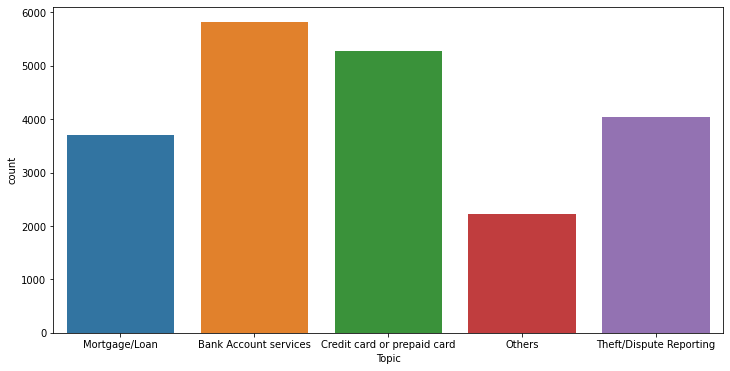

In [129]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=df_clean)

# Model building using supervised learning, Model training & evaluation

### Supervised model to predict any new complaints to the relevant Topics.
We now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [130]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data = df_clean[['complaint_text','Topic']]

In [131]:
training_data.head()

,complaint_text,Topic
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Mortgage/Loan
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Bank Account services
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Credit card or prepaid card
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,Credit card or prepaid card
4,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,Bank Account services


In [132]:
reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()

,complaint_text,Topic
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,4
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,0
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
4,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0


In [133]:
training_data[['complaint_text','Topic']][training_data.Topic==2].head(3)

,complaint_text,Topic
7,during the summer months i experience a decline income due to my employment therefore i request a one month payment extension with my auto loan company chase for the past almost fours years my request for payment extension is granted i have never been delinquent with my auto loan payment however on my request for a one month payment extension was denied this year i explained my situation to representative and the supervisor with no avail after a lengthy discussion and waiting i was informed the reason for the decline as it is not contractual this reason for denial baffled me and therefore i emailed the office of xxxx xxxx executive director communications jpmorgan chase co a representative contacted me and stated chase will followup about week later a representative of xxxx xxxx xxxx xxxx office called the representative shared her role was help resolve the matter the representative via conference call contacted the department handing my request after reviewing my information my request was still denied based on policy changes i requested an explanation and representative stated a letter will be mailed with explanation i have received xxxx letters the reason for denial was not policy changes i would like cfpb help in exploring the denial of my payment extension request especially since i have been clear reason for denial,2
24,i made a purchase of on xxxxxxxx i made payments of on xxxxxxxx and on xxxxxxxx the minimum payment was the closing date was xxxxxxxx please see attached statement that statement xxxxxxxx shows that i had an outstanding purchase balance of on xxxxxxxx i have enclosed the previous months statement to show that there were no other purchases prior to the one on xxxxxxxx \nhowever when i got the xxxx statement it shows that i still have a purchase balance of i have a promotional balance xxxx in xxxx of in xxxx the promotional balance was a difference of apparently the payment above the minimum payment required by chase i thought would be applied to the purchase was applied to the promotional balance first it is my understanding that once the minimum payment has been met payments in excess of the minimum would be applied to the highest interest rate balance first this is not the first time that chase has skirted us financial law to turn a larger profit i need help in rectifying this problem because my logic fell on deaf ears at chase thank you in advance for your assistance \n\nrespectfully xxxx xxxx xxxx,2
33,i recently called to ask chase bank why they reported to the credit bureau that i was days late on a payment that was already paid off when i called i got this info they showed that on the xxxx of i was very late on my bill and owed xxxx to bring this balance down to xxxx and be finished with the bill i paid that amount on the same day the xxxx to being it to xxxx \n\nthey say that i tried to make another payment for later that same day and in a few days that came back as a return payment \n\nthe man on the phone stated to me that if the payment went through then it would have meant that i had a credit on my account for xxxx since i didnt owe anything \n\nthey updated my account with charges and late fees from the return payment that i had no idea of since i thought i paid off the entire amount they reported to the credit bureau that i was days late for not paying what accrued to be the guy representing chase agreed with me that they were in the wrong for charging me the fees and said they would remove them i still have in the negative that they are saying that i owe in the mobile app \n\nadditionally because they reported me being late my credit score dropped points when i called back to ask if they can report that they made a mistake they said i would have to do that on my own i think thats xxxx,2


# Apply the supervised models on the training data created. In this process, you have to do the following:

Create the vector counts using Count Vectoriser

Transform the word vecotr to tf-idf

Create the train & test data using the train_test_split on the tf-idf & topics

# x - y split

In [134]:
# x - y  split
X = training_data.complaint_text
y = training_data.Topic

In [135]:
#Write your code to get the Vector count 

# Fit transform the X
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

In [136]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

# Train Test Split

In [137]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

You have to try atleast 3 models on the train & test data from these options:

### We are trying the following models -

Logistic regression 

Decision Tree 

Random Forest 

Naive Bayes (optional) 

### Using the required evaluation metrics judge the tried models and select the ones performing the best

In [144]:
# Write your code here to build any 3 models and evaluate them using the required metrics

from sklearn.naive_bayes import MultinomialNB 
# Important note regarding Multinomial naive bayes. The naive bayes wants your features to be stringly independent due to which 
# P(feat1,....,featn|class) = multiplication(P(feat1|class)) ----> 
# MNB works on the assumption that every P(feature|class) has multinomial distribution which works well on count based data i.e word count on text  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [145]:
# utlity function to display the model report

def display_classification_report(model,metric):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)
        
    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show();

In [146]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [147]:
# utility method to get the GridSearchCV object
def grid_search(model,folds,params,scoring):
    
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [148]:
# utility function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

### Multinomial Naive Bayes Classification

ROC AUC Score Train: 0.95
ROC AUC Score Test: 0.93
Train Accuracy : 0.68
Test Accuracy : 0.64
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.57      0.95      0.71      4362
           1       0.69      0.81      0.74      3955
           2       0.96      0.01      0.03      1672
           3       0.90      0.52      0.66      3031
           4       0.88      0.67      0.76      2784

    accuracy                           0.68     15804
   macro avg       0.80      0.59      0.58     15804
weighted avg       0.76      0.68      0.64     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.54      0.94      0.68      1454
           1       0.65      0.75      0.69      1318
           2       1.00      0.01      0.01       558
           3       0.86      0.43      0.57      1010
           4       0.86      0.63      0.73       928

    accuracy            

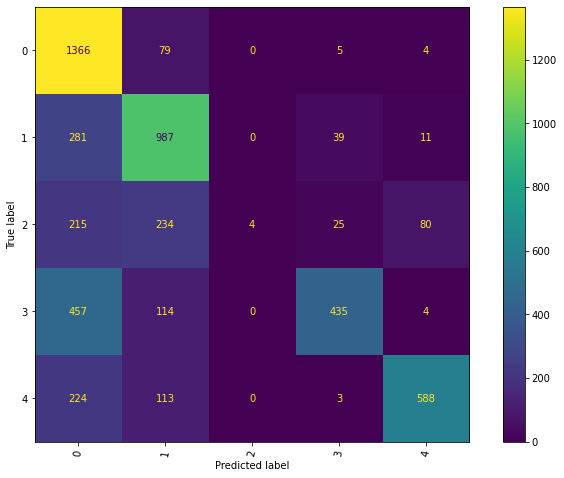

In [149]:
# Multinomial Naive Bayes Classification

# create MNB model object
mnb = MultinomialNB()
# fit model
mnb.fit(X_train, y_train)
# display classification report
metric1=[]
display_classification_report(mnb,metric1)

### Logistic Regression Classification

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.94
Test Accuracy : 0.9
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      4362
           1       0.94      0.96      0.95      3955
           2       0.97      0.88      0.92      1672
           3       0.94      0.93      0.94      3031
           4       0.95      0.94      0.95      2784

    accuracy                           0.94     15804
   macro avg       0.95      0.93      0.94     15804
weighted avg       0.94      0.94      0.94     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1454
           1       0.90      0.93      0.91      1318
           2       0.95      0.80      0.87       558
           3       0.91      0.88      0.89      1010
           4       0.93      0.90      0.91       928

    accuracy              

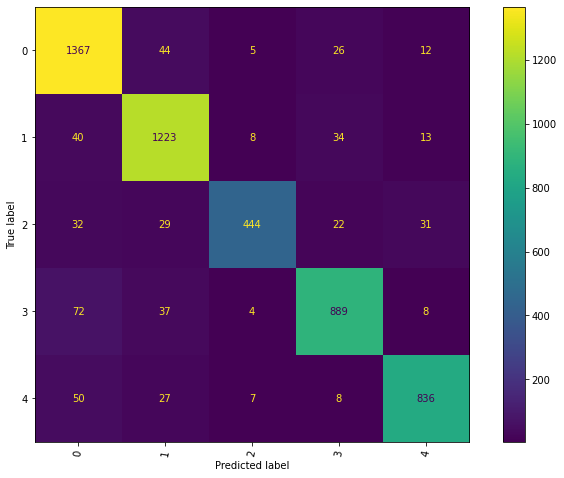

In [150]:
# Logistic Regression Classification
log_reg = LogisticRegression(random_state=40,solver='liblinear')
# fit model
log_reg.fit(X_train,y_train)
# display classification report
metric2=[]
display_classification_report(log_reg,metric2)

### Decision Tree Classification

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.86
Train Accuracy : 1.0
Test Accuracy : 0.77
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      3955
           2       1.00      1.00      1.00      1672
           3       1.00      1.00      1.00      3031
           4       1.00      1.00      1.00      2784

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1454
           1       0.81      0.81      0.81      1318
           2       0.70      0.70      0.70       558
           3       0.72      0.74      0.73      1010
           4       0.79      0.76      0.78       928

    accuracy              

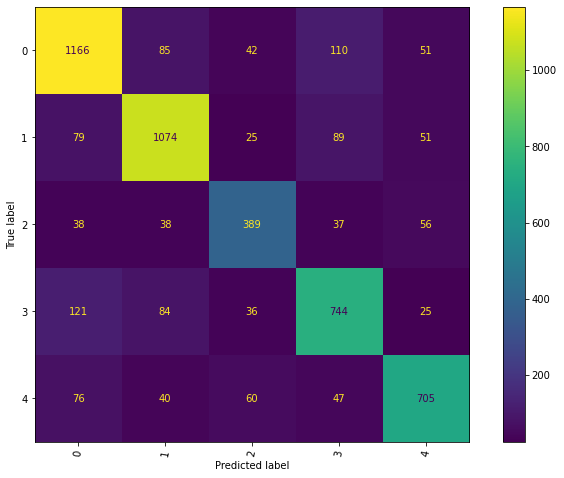

In [151]:
# Decision Tree Classification
dtc = DecisionTreeClassifier(random_state=40)
# fit model
dtc.fit(X_train,y_train)
# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)

### Random Forest Classification

OOB SCORE : 0.8078334598835738
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.98
Train Accuracy : 1.0
Test Accuracy : 0.82
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      3955
           2       1.00      1.00      1.00      1672
           3       1.00      1.00      1.00      3031
           4       1.00      1.00      1.00      2784

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84      1454
           1       0.80      0.88      0.84      1318
           2       0.95      0.39      0.56       558
           3       0.86      0.79      0.82      1010
           4       0.89      0.83      0.86       

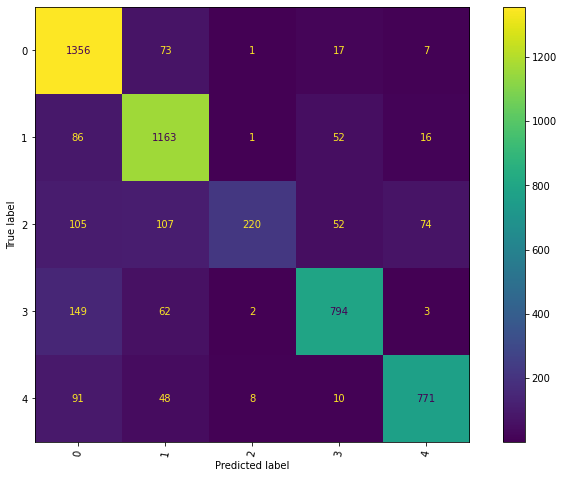

In [152]:
# Random Forest Classification

rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)
# fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)

## Hyper parameter tuning with GridSearchCV

### Multinomial Naive Bayes with GridSearchCV

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score:  0.7543020555103936
Best Hyperparameters:  {'alpha': 0.01}
ROC AUC Score Train: 0.99
ROC AUC Score Test: 0.94
Train Accuracy : 0.89
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4362
           1       0.87      0.90      0.89      3955
           2       0.91      0.79      0.85      1672
           3       0.90      0.89      0.90      3031
           4       0.92      0.90      0.91      2784

    accuracy                           0.89     15804
   macro avg       0.90      0.88      0.89     15804
weighted avg       0.89      0.89      0.89     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80      1454
           1       0.75      0.75      0.75      1318
           2       0.72      0.49      0.59       558
  

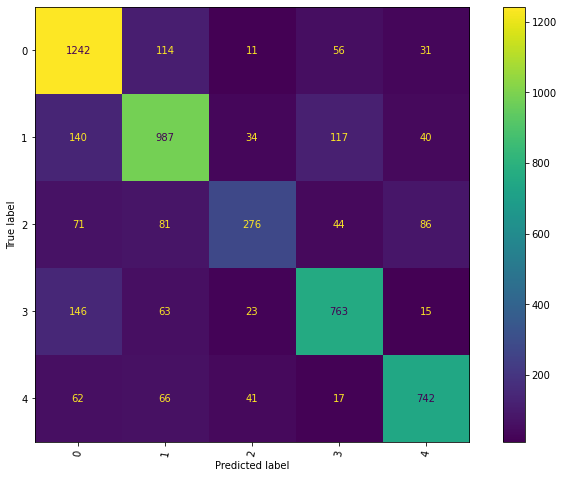

In [153]:
# Multinomial Naive Bayes with GridSearchCV

mnb = MultinomialNB()

mnb_params = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001)  
#Laplace smoothing is a smoothing technique that helps 
#tackle the problem of zero probability in the Naïve Bayes machine learning algorithm. 
#Using higher alpha values will push the likelihood towards a value of 0.5, i.e., 
#the probability of a word equal to 0.5 for both the positive and negative reviews
}

# create gridsearch object
grid_search_mnb = grid_search(mnb, folds, mnb_params, scoring=None)

# fit model
grid_search_mnb.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_mnb)

# Random Forest Classification Report
metric5=[]
display_classification_report(grid_search_mnb,metric5)

### Logistic Regression with GridSearchCV

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score:  0.9243230190734385
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
ROC AUC Score Train: 0.99
ROC AUC Score Test: 0.99
Train Accuracy : 0.93
Test Accuracy : 0.93
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4362
           1       0.93      0.95      0.94      3955
           2       0.94      0.92      0.93      1672
           3       0.93      0.92      0.92      3031
           4       0.95      0.93      0.94      2784

    accuracy                           0.93     15804
   macro avg       0.94      0.93      0.93     15804
weighted avg       0.93      0.93      0.93     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1454
           1       0.94      0.94      0.94      1318
           2       0.94    

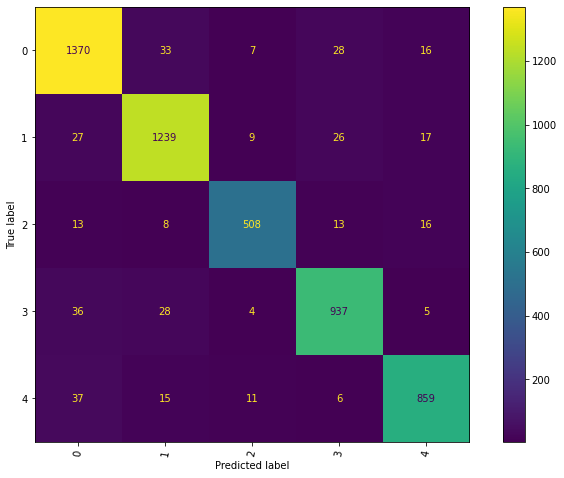

In [154]:
# Logistic Regression with GridSearchCV

# logistic regression
log_reg = LogisticRegression()

# hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# create gridsearch object
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

# fit model
grid_search_log.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_log)

# Random Forest Classification Report
metric6=[]
display_classification_report(grid_search_log,metric6)

### Decision Tree Classification with GridSearchCV

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.9394203106219168
Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 30}
ROC AUC Score Train: 0.97
ROC AUC Score Test: 0.94
Train Accuracy : 0.83
Test Accuracy : 0.79
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      4362
           1       0.84      0.87      0.85      3955
           2       0.83      0.79      0.81      1672
           3       0.80      0.78      0.79      3031
           4       0.86      0.81      0.84      2784

    accuracy                           0.83     15804
   macro avg       0.83      0.82      0.82     15804
weighted avg       0.83      0.83      0.83     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79      1454
           1       0.80      0.84      0.82      1318
           2       0.79      

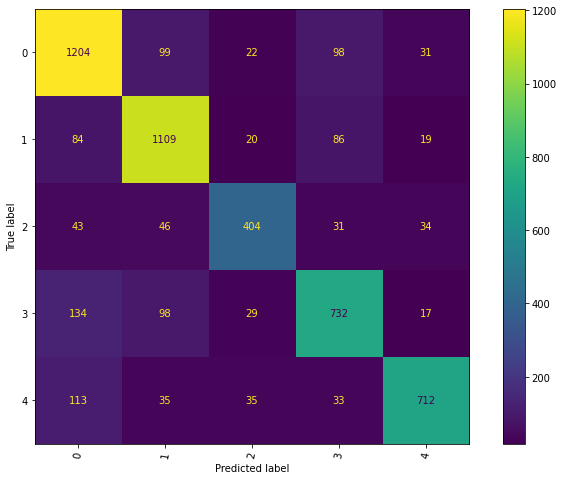

In [155]:
# Decision Tree Classification wuth GridSearchCV

dtc = DecisionTreeClassifier(random_state=40)

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# create gridsearch object
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

# fit model
grid_search_dtc.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_dtc)

# Random Forest Classification Report
metric7=[]
display_classification_report(grid_search_dtc,metric7)

### Random Forest Classifier with GridSearchCV

Fitting 5 folds for each of 80 candidates, totalling 400 fits
OOB SCORE : 0.7781574284991142
Best Score:  0.9699708781411722
Best Hyperparameters:  {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 700}
ROC AUC Score Train: 0.99
ROC AUC Score Test: 0.97
Train Accuracy : 0.89
Test Accuracy : 0.79
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      4362
           1       0.84      0.96      0.90      3955
           2       1.00      0.57      0.72      1672
           3       0.95      0.89      0.92      3031
           4       0.92      0.88      0.90      2784

    accuracy                           0.89     15804
   macro avg       0.91      0.85      0.87     15804
weighted avg       0.90      0.89      0.89     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      1454
           1       0.74      0.

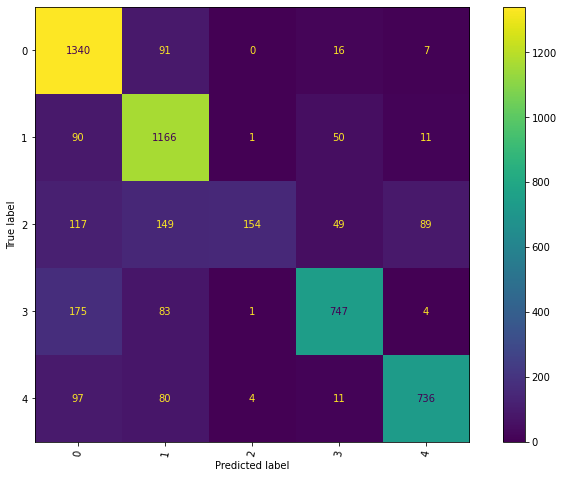

In [156]:
# Random Forest Classifier with GridSearchCV

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }

# create gridsearch object
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')

# fit model
grid_search_rfc.fit(X_train, y_train)

# oob score
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(grid_search_rfc)

# Random Forest Classification Report
metric8=[]
display_classification_report(grid_search_rfc,metric8)

## Model inference
### Consolidated view of all the models and their metrics

In [157]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ], 
        'Multinomial Naive Bayes': metric1
        }

mnb_metric = pd.DataFrame(table ,columns = ['Metric', 'Multinomial Naive Bayes'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')
grid_mnb_metric = pd.Series(metric5, name = 'Multinomial Naive Bayes with GridSearchCV')
grid_log_metric = pd.Series(metric6, name = 'Logistic Regression with GridSearchCV')
grid_dtc_metric = pd.Series(metric7, name = 'Decision Tree Classifier with GridSearchCV')
grid_rfc_metric = pd.Series(metric8, name = 'Random Forest Classifier with GridSearchCV')

final_metric = pd.concat([mnb_metric,log_metric,dtc_metric,rfc_metric,
                         grid_mnb_metric,grid_log_metric,grid_dtc_metric,grid_rfc_metric], axis = 1)

final_metric

,Metric,Multinomial Naive Bayes,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,Multinomial Naive Bayes with GridSearchCV,Logistic Regression with GridSearchCV,Decision Tree Classifier with GridSearchCV,Random Forest Classifier with GridSearchCV
0,ROC_AUC Score(Train),0.95,1.00,1.00,1.00,0.99,0.99,0.97,0.99
1,ROC_AUC Score(Test),0.93,0.99,0.86,0.98,0.94,0.99,0.94,0.97
2,Accuracy(Train),0.68,0.94,1.00,1.00,0.89,0.93,0.83,0.89
3,Accuracy(Test),0.64,0.90,0.77,0.82,0.76,0.93,0.79,0.79
4,Precision(Train),0.76,0.94,1.00,1.00,0.89,0.93,0.83,0.90
5,Precision(Test),0.73,0.90,0.77,0.83,0.76,0.93,0.79,0.81
6,Recall(Train),0.68,0.94,1.00,1.00,0.89,0.93,0.83,0.89
7,Recall(Test),0.64,0.90,0.77,0.82,0.76,0.93,0.79,0.79
8,F1-Score(Train),0.64,0.94,1.00,1.00,0.89,0.93,0.83,0.89
9,F1-Score(Test),0.60,0.90,0.77,0.81,0.76,0.93,0.79,0.77


## Complaint Prediction using the best model above
## The best model looks to be Logistic Regression with GridSearchCV

In [158]:
# raw complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'

In [ ]:
# clean the raw text
#test_complaint = clean_text(test_complaint)
#test_complaint = lemmatizer(test_complaint)
#test_complaint = extract_pos_tags(test_complaint)
#test_complaint

In [159]:
# vectorize and tf-idf tranform
test = count_vect.transform([test_complaint])
test_tfidf = tfidf_transformer.transform(test)

In [160]:
# predict
prediction=grid_search_log.predict(test_tfidf)
prediction

array([0])

In [161]:
topic_mapping[prediction[0]]

'Bank Account services'